# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class.

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [2]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)


# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [3]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45


dataloader = DataLoader(TensorDataset(X_t, y_t), batch_size=batchSize, shuffle=True)

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

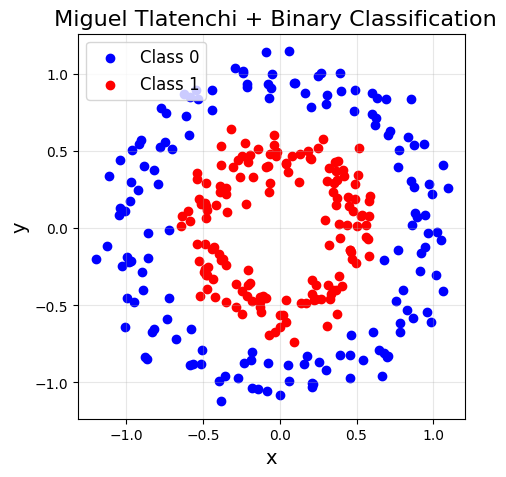

In [4]:
# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')

# Add Label and title
plt.title(" Miguel Tlatenchi + Binary Classification", fontsize=16)
# Your code set graph axises
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

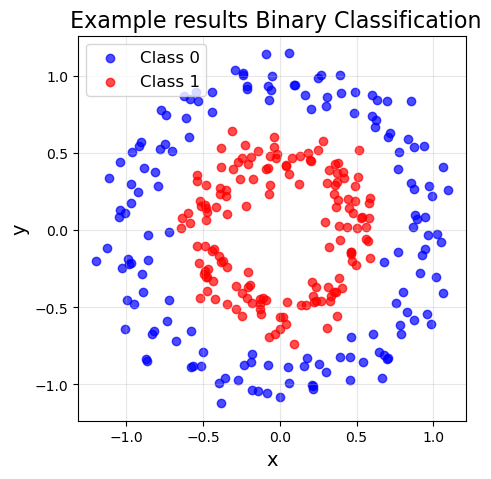

In [ ]:
# Plot each class
# Example results

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [5]:

class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Your code
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()


        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop:
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [6]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6

    # Your code
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()        # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten()       # Forward pass to get output
            loss = criterion(y_hat, y)        # Calculate loss
            loss.backward()        # Getting gradients w.r.t. parameters
            optimizer.step()           # Update parameters
            losses += loss.item()       # Add loss for this batch to running total
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [9]:
LEARNING_RATE = 0.1
criterion = nn.MSELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

Let's train the model:

In [10]:
# Your code
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(2, 6, 1)
trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)

epoch: 1, loss: 0.2510
epoch: 2, loss: 0.2512
epoch: 3, loss: 0.2513
epoch: 4, loss: 0.2506
epoch: 5, loss: 0.2512
epoch: 6, loss: 0.2506
epoch: 7, loss: 0.2513
epoch: 8, loss: 0.2509
epoch: 9, loss: 0.2509
epoch: 10, loss: 0.2508
epoch: 11, loss: 0.2508
epoch: 12, loss: 0.2511
epoch: 13, loss: 0.2507
epoch: 14, loss: 0.2508
epoch: 15, loss: 0.2510
epoch: 16, loss: 0.2509
epoch: 17, loss: 0.2508
epoch: 18, loss: 0.2510
epoch: 19, loss: 0.2510
epoch: 20, loss: 0.2510
epoch: 21, loss: 0.2511
epoch: 22, loss: 0.2507
epoch: 23, loss: 0.2509
epoch: 24, loss: 0.2510
epoch: 25, loss: 0.2509
epoch: 26, loss: 0.2501
epoch: 27, loss: 0.2511
epoch: 28, loss: 0.2517
epoch: 29, loss: 0.2507
epoch: 30, loss: 0.2512


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([45, 1])) that is different to the input size (torch.Size([45])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([30, 1])) that is different to the input size (torch.Size([30])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [11]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [12]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code
def trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True):
    loss_history = []
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()        # Clear gradients w.r
            y_hat = model(X)      # Forward
            loss = criterion(y_hat, y)        # Calculate loss
            loss.backward()        # Getting gradients w.r.t. parameters
            optimizer.step()           # Update parameters
            losses += loss.item()   # Add loss for this batch to running total

            loss_history.append(loss.item())
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
    return loss_history



#### Visualize your results

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

epoch: 1, loss: 0.6524
epoch: 2, loss: 0.6244
epoch: 3, loss: 0.5770
epoch: 4, loss: 0.5486
epoch: 5, loss: 0.5271
epoch: 6, loss: 0.5012
epoch: 7, loss: 0.4410
epoch: 8, loss: 0.3674
epoch: 9, loss: 0.3019
epoch: 10, loss: 0.2633
epoch: 11, loss: 0.2314
epoch: 12, loss: 0.2078
epoch: 13, loss: 0.1916
epoch: 14, loss: 0.1731
epoch: 15, loss: 0.1410
epoch: 16, loss: 0.1252
epoch: 17, loss: 0.0982
epoch: 18, loss: 0.0815
epoch: 19, loss: 0.0734
epoch: 20, loss: 0.0644
epoch: 21, loss: 0.0565
epoch: 22, loss: 0.0559
epoch: 23, loss: 0.0536
epoch: 24, loss: 0.0483
epoch: 25, loss: 0.0484
epoch: 26, loss: 0.0451
epoch: 27, loss: 0.0442
epoch: 28, loss: 0.0407
epoch: 29, loss: 0.0402
epoch: 30, loss: 0.0391


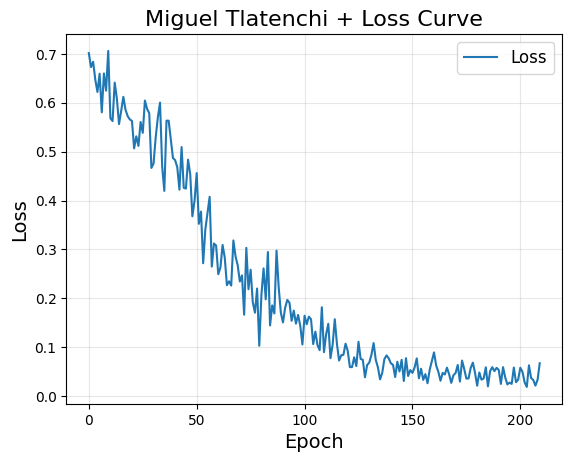

In [13]:
loss_history = trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)
plt.plot(loss_history, label='Loss')
plt.title("Miguel Tlatenchi + Loss Curve", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Part 2: Actual and predicted data

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

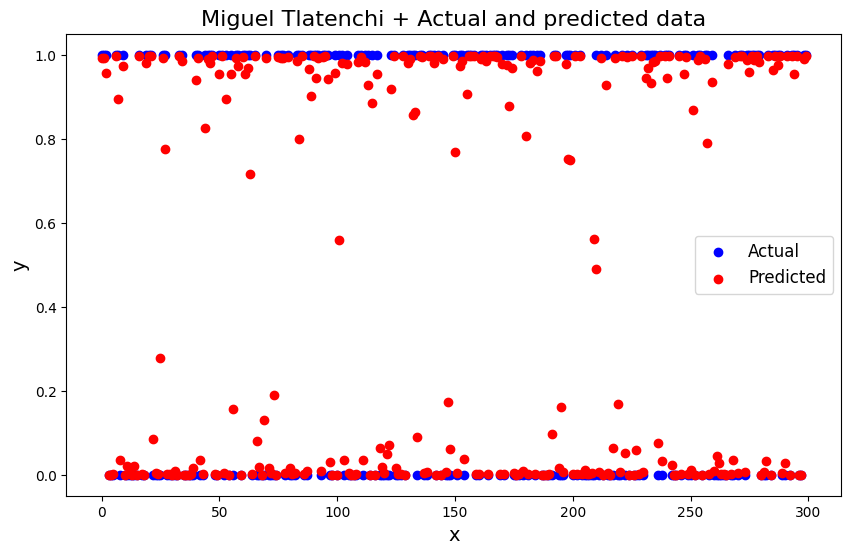

In [14]:
# Your code
#get actual and predicted values
actual_data = []
predicted_data = []

# Set the model to evaluation mode
model.eval()  # We don't need gradients for validation/inference

with torch.no_grad():  # Disable gradient calculation
    for X, y in dataloader:
        y_hat = model(X)  # Get predictions from the model

        actual_data.extend(y.numpy())  # Actual values (targets)
        predicted_data.extend(y_hat.numpy())  # Predicted values

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(range(len(actual_data)), actual_data, color='blue', label='Actual')
plt.scatter(range(len(predicted_data)), predicted_data, color='red', label='Predicted')


plt.title("Miguel Tlatenchi + Actual and predicted data", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [22]:
prediction = model(torch.tensor([[0.0, 0.0]], dtype=torch.float32))
print(prediction)

tensor([[0.9976]], grad_fn=<SigmoidBackward0>)


In [23]:
probability = torch.sigmoid(prediction)
print(probability)

tensor([[0.7306]], grad_fn=<SigmoidBackward0>)


In [24]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[[1]]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1.

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss.

Let's try a 4-class classification problem using the following network:


In [25]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=45, shuffle=True)

In [26]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

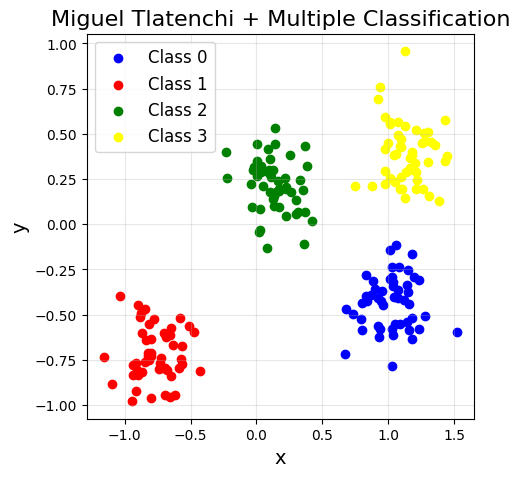

In [27]:
# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')
plt.scatter(X[y==2, 0], X[y==2, 1], color='green', label='Class 2')
plt.scatter(X[y==3, 0], X[y==3, 1], color='yellow', label='Class 3')

# Add Label and title
plt.title("Miguel Tlatenchi + Multiple Classification", fontsize=16)
# Your code

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [28]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code
model_2 = multiClassifier(2, 6, 4)

# Your code
# loss function with CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss()

# optimization algorithm - Adam lr=0.2
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.2)

accuracy_history = []
for epoch in range(10):
    losses = 0
    correct = 0
    total = 0
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()     # Clear gradients w.r.t. parameters
        y_hat = model_2(X_batch)    # Forward pass to get output
        loss = criterion(y_hat, y_batch)    # Calculate loss
        loss.backward()                 # Getting gradients w.r.t. parameters
        optimizer.step()                # Update parameters
        losses += loss.item()           # Add loss for this batch to running total

        #calcuate accuracy
        _, predicted = torch.max(y_hat, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total
    accuracy_history.append(accuracy)

    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

epoch: 1, loss: 1.1345
epoch: 2, loss: 0.4456
epoch: 3, loss: 0.1107
epoch: 4, loss: 0.0302
epoch: 5, loss: 0.0159
epoch: 6, loss: 0.0096
epoch: 7, loss: 0.0032
epoch: 8, loss: 0.0033
epoch: 9, loss: 0.0044
epoch: 10, loss: 0.0027


#### Visualize your results

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

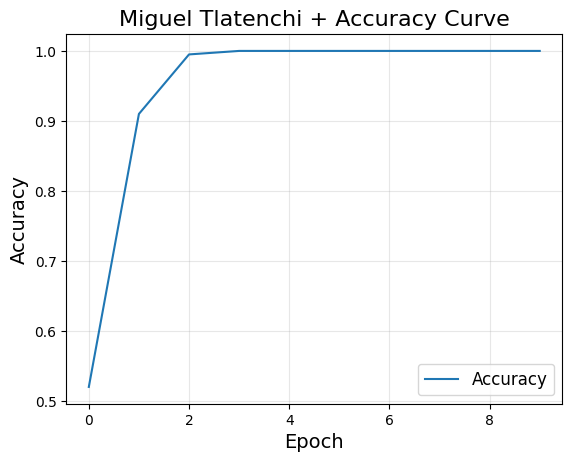

In [29]:
# Your code
plt.plot(accuracy_history, label='Accuracy')
plt.title("Miguel Tlatenchi + Accuracy Curve", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

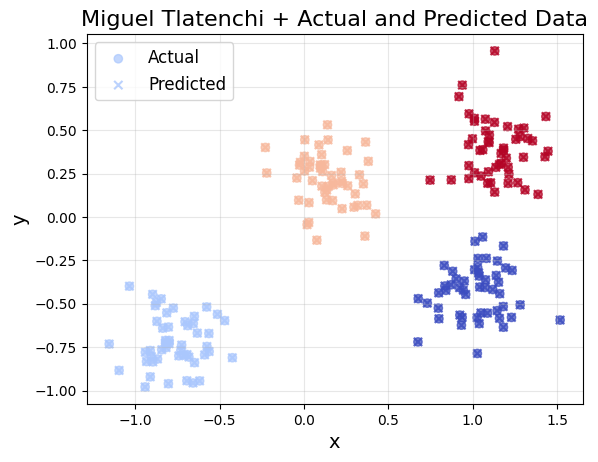

In [40]:
# Your code
# Get predictions and actual labels
y_pred = model_2(X_t).argmax(dim=1).detach().numpy()  # Convert to class labels
y_actual = y_t.numpy()

# Plot Actual Data
plt.scatter(X_t.numpy()[:, 0], X_t.numpy()[:, 1], c=y_actual, cmap='coolwarm', marker='o', alpha=0.7, label='Actual')

# Plot Predicted Data (overlay)
plt.scatter(X_t.numpy()[:, 0], X_t.numpy()[:, 1], c=y_pred, cmap='coolwarm', marker='x', alpha=0.8, label='Predicted')

# Labels and title
plt.title("Miguel Tlatenchi + Actual and Predicted Data", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()